# Exploring Matplotlib on my own ⏣
---

I’ve done a couple of [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html), and now I want to practice making my own visualizations of data.

Here are a few starting points, but I’m sure more ideas will come. The point is to become good at using the common Matplotlib APIs.

- exploring a loaded dataset: distribution, min, max, 2d histogram
- visualizing an image
- visualizing a confusion matrix (true positives, false positives, true negatives, false negatives)
- blurring an image
- contour plot of loss for two input features
- plot loss given number of gradient descent iterations

## Initial setup 🐝
---

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets
import inspect
import pprint

### Load a dataset using Scikit-Learn

`sklearn` gives me an object of type:

I need some sample data to play with. I’ll try to use the built-in [datasets of Scikit-Learn](https://scikit-learn.org/stable/datasets/index.html).

In [15]:
boston = sklearn.datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [14]:
print(inspect.getdoc(sklearn.utils.Bunch))

Container object exposing keys as attributes

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6


Okay, so it’s pretty much a Python `dict` that I can access by attribute:

In [49]:
pprint.pprint(boston)

{'DESCR': '.. _boston_dataset:\n'
          '\n'
          'Boston house prices dataset\n'
          '---------------------------\n'
          '\n'
          '**Data Set Characteristics:**  \n'
          '\n'
          '    :Number of Instances: 506 \n'
          '\n'
          '    :Number of Attributes: 13 numeric/categorical predictive. '
          'Median Value (attribute 14) is usually the target.\n'
          '\n'
          '    :Attribute Information (in order):\n'
          '        - CRIM     per capita crime rate by town\n'
          '        - ZN       proportion of residential land zoned for lots '
          'over 25,000 sq.ft.\n'
          '        - INDUS    proportion of non-retail business acres per '
          'town\n'
          '        - CHAS     Charles River dummy variable (= 1 if tract '
          'bounds river; 0 otherwise)\n'
          '        - NOX      nitric oxides concentration (parts per 10 '
          'million)\n'
          '        - RM       average num

In [47]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
list(boston)

['data', 'target', 'feature_names', 'DESCR', 'filename']

In [24]:
boston.data.shape

(506, 13)

In [26]:
boston.target.shape

(506,)

In [36]:
print(boston.feature_names)
print(boston.feature_names.size)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [30]:
print(boston.filename)

/Users/andy/opt/anaconda3/envs/mpl_fun/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv


In [54]:
# First 3 instances
print(repr(boston.data[:3, :]))

# Last 3
print(repr(boston.data[-3:, :]))

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])
array([[6.0760e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.9760e+00, 9.1000e+01, 2.1675e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9690e+02, 5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.7940e+00, 8.9300e+01, 2.3889e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9345e+02, 6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.0300e+00, 8.0800

In [56]:
boston.data[1, :]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

### Plot number of rooms and median home value

In [44]:
room_index = list(boston.feature_names).index('RM')
room_index

5

In [62]:
rooms = boston.data[:, room_index]
rooms.shape

(506,)

In [63]:
y = boston.target
y.shape

(506,)

Figure(432x288)
figure size: 6.0 x 4.0 inches
dpi: 72.0


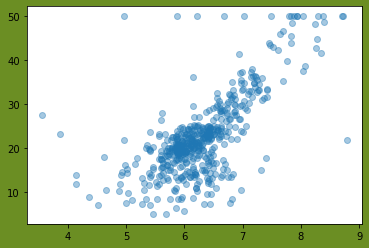

In [96]:
figure = plt.figure(facecolor='olivedrab')
print(figure)
print(f"figure size: {figure.get_figwidth()} x {figure.get_figheight()} inches")
print(f"dpi: {figure.dpi}")
plt.scatter(rooms, y, alpha=0.4)

Figure(110x110)
figure size: 1.0 x 1.0 inches
dpi: 110


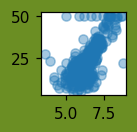

In [100]:
figure = plt.figure(facecolor='olivedrab', dpi=110, figsize=(1, 1))
print(figure)
print(f"figure size: {figure.get_figwidth()} x {figure.get_figheight()} inches")
print(f"dpi: {figure.dpi}")
plt.scatter(rooms, y, alpha=0.4)

[]

## Minimal, stripped figure
---

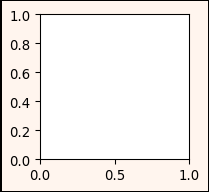

In [128]:
figure = plt.figure(facecolor='seashell', edgecolor='k', linewidth=1.0, dpi=, figsize=(2, 2))
ax = plt.subplot()
# plt.plot([1, 2, 3], [4, 9, 3])
# ax.set_axis_off()
# ax.scatter([1, 2, 3], [5, 9, 3], c='k')
# plt.grid(True)
# plt.title('Figure Title')
# plt.show()

## Exploring a loaded dataset: distribution, min, max, 2d histogram
---

## Visualizing an image
---

## Visualizing a confusion matrix (true positives, false positives, true negatives, false negatives)
---

## Blurring an image
---

## Contour plot of loss for two input features
---

## Plot loss given number of gradient descent iterations
---